# Dataset de Pokemon - Ejemplo de EDA ( Exploratory Data Analyst )
## Nos piden seleccionar el Pokemon que sea Volador y que tenga el mayor Atk Speed (da igual la generación) y uno que pueda combatir vs Jolteon utilizando un Pokemon de la primera generación

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

: 

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
### There are duplicated Pokemon in the dataset. True or false? 
### Note that for scenarios where there are two versions of the same Pokemon e.g. “VenusaurMega Venusaur” and “Venusaur”,
### it does NOT count as duplicated Pokemon.
df[df.duplicated()].sum()

#             0.0
Name          0.0
Type 1        0.0
Type 2        0.0
Total         0.0
HP            0.0
Attack        0.0
Defense       0.0
Sp. Atk       0.0
Sp. Def       0.0
Speed         0.0
Generation    0.0
Legendary     0.0
dtype: float64

In [7]:
### How many columns are there in the dataset?
### In total, how many Pokemons are there in the dataset?
df.shape

(800, 13)

In [8]:
### How many legendary Pokemon are there?
df[df['Legendary']==True].count()

#             65
Name          65
Type 1        65
Type 2        40
Total         65
HP            65
Attack        65
Defense       65
Sp. Atk       65
Sp. Def       65
Speed         65
Generation    65
Legendary     65
dtype: int64

In [9]:
### Which Pokemon has the highest Attack? Be careful to spell the name of the Pokemon correctly, including use of spaces (if any).
df.sort_values('Attack', ascending= False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


In [10]:
### Which Pokemon has the lowest HP? Be careful to spell the name of the Pokemon correctly, including use of spaces (if any).
df.sort_values('HP', ascending= True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
388,355,Duskull,Ghost,NaN,295,20,40,90,30,90,25,3,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


In [11]:
### Which generation has the most number of Pokemon?
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [12]:
### What is the most common Speed?
df['Speed'].mode()

0    50
dtype: int64

In [33]:
df_1 = df.groupby('Type 1')[['Name','Sp. Atk']]

In [34]:
df_1.head()

,Name,Sp. Atk
0,Bulbasaur,65
1,Ivysaur,80
2,Venusaur,100
3,VenusaurMega Venusaur,122
4,Charmander,60
...,...,...
366,AltariaMega Altaria,110
702,TornadusIncarnate Forme,125
703,TornadusTherian Forme,110
790,Noibat,45


In [37]:
df.sort_values(['Type 1','Sp. Atk'], ascending= True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True


In [49]:
df_generacion2 = df[df['Generation']==2]
df_generacion2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
166,152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
167,153,Bayleef,Grass,NaN,405,60,62,80,63,80,60,2,False
168,154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
169,155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False
170,156,Quilava,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


In [50]:
### In Generation 2, how many Type 2 Fairy Pokemon are there?
df_generacion2[df_generacion2['Type 2'] == 'Fairy']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
198,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
199,184,Azumarill,Water,Fairy,420,100,50,80,60,80,50,2,False


In [41]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [54]:
### Which Type 1 Flying Pokemon has the highest Sp. Atk?
### Be careful to spell the name of the Pokemon correctly, including use of spaces (if any).
df[df['Type 1']=='Flying'].sort_values(by='Sp. Atk', ascending= False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
702,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


### APP 2.1 
#### Nos piden buscar el mejor pokemon de la primera generación para pelear vs Jolteon

In [80]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [81]:
### Seleccionamos el df de la primera Generación
df_type_gen1 = df[df['Generation']==1]
df_type_gen1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [82]:
### Visualizamos el status del Contrincante (Jolteon)
df[df['Name']=='Jolteon']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
146,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False


In [83]:
### Buscamos el tipo 1 del pokemon
df[df['Name']=='Jolteon']['Type 1']


146    Electric
Name: Type 1, dtype: object

In [55]:
### Según https://www.theloadout.com/pokemon-type-chart
### Electric weak to: Grass, Electric, Dragon, Ground(no effect)
### Por lo que buscamos quienes tienen esos atributos en la generación 1 


In [84]:
df_ground = df_type_gen1[df_type_gen1['Type 1']=='Ground']
df_ground

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
32,27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
112,104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False
119,111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False
120,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False


In [85]:
df_type_gen1_sorted = df_ground.sort_values('Sp. Def', ascending=False)

In [86]:
df_type_gen1_sorted.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False


### 2.2 Investigación HP Pokemon

In [ ]:
#df = pd.read_csv('Pokemon.csv')
#df.head()

<AxesSubplot:xlabel='Generation', ylabel='HP'>

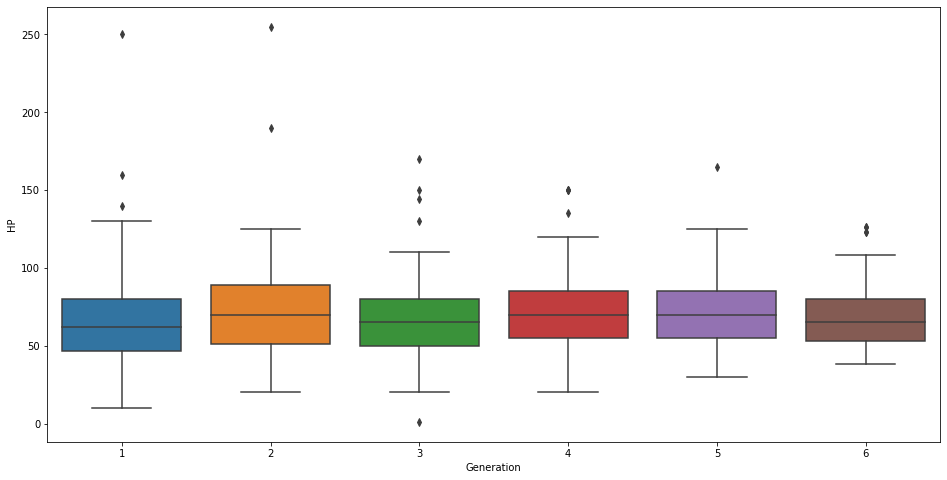

In [87]:
plt.figure(figsize = (16,8))
sns.boxplot(x = 'Generation', y = 'HP', data = df)

In [88]:
quantile_97 = df['HP'].quantile(0.97)
quantile_97

120.08999999999992

In [89]:
df['HP'].quantile(0.03)

30.97

In [90]:
df[df['HP']>df['HP'].quantile(0.97)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
145,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
185,171,Lanturn,Water,Electric,460,125,58,58,76,76,67,2,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False


In [91]:
### buscar outliers 
hp_outliers_df = df[df['HP']>df['HP'].quantile(0.97)]

In [92]:
hp_outliers_id = hp_outliers_df.index.tolist()

In [93]:
hp_outliers_id

[45,
 121,
 142,
 145,
 155,
 185,
 217,
 261,
 313,
 321,
 350,
 351,
 473,
 495,
 544,
 545,
 655,
 710,
 711,
 712,
 741,
 769,
 792,
 793]

In [94]:
df_hp_no_outliers = df.drop(hp_outliers_id)

In [97]:
df_hp_no_outliers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<AxesSubplot:xlabel='Generation', ylabel='HP'>

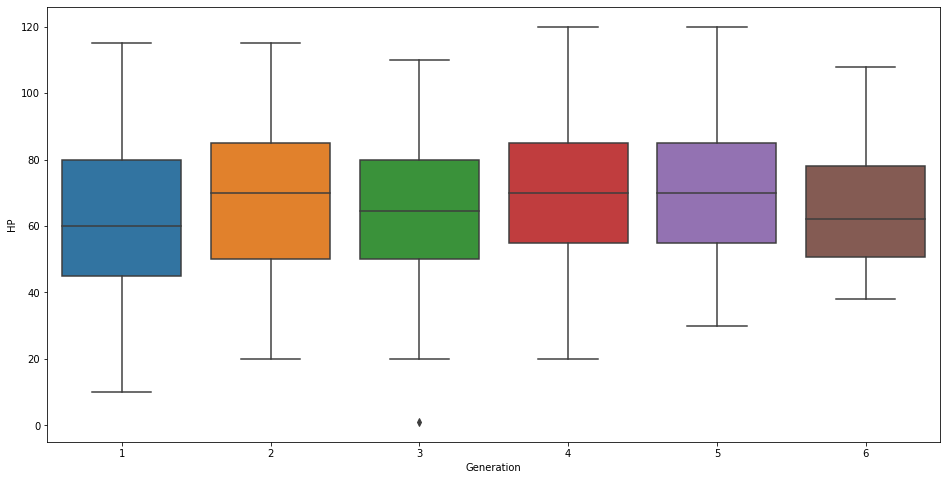

In [98]:
plt.figure(figsize = (16,8))
sns.boxplot(x = 'Generation', y = 'HP', data = df_hp_no_outliers)

In [99]:
df_type_gen1_sorted.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False


<AxesSubplot:xlabel='Generation', ylabel='HP'>

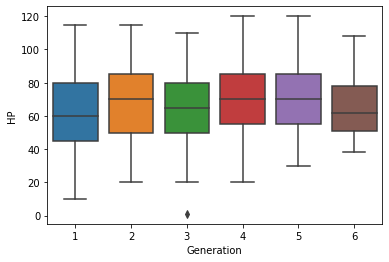

In [103]:

sns.boxplot(x = 'Generation', y = 'HP', data = df_hp_no_outliers)